# Test Estimation Classification Prediction 検定 推定 分類 予測

## Test 検定
### Two SNPs and their haplotypes

[What is a SNP?](https://en.wikipedia.org/wiki/Single-nucleotide_polymorphism)

[What is a haplotype?](https://en.wikipedia.org/wiki/Haplotype)

Assume two SNPs, Sa and Sb whose alleles are (A,a) and (B,b), respectively, with four haplotypes, (A-B), (A-b), (a-B), and (a,b).

Sa vs. Sb| B|  b|Column sum
---------|--|---| ----
A        |45|15| 60
a        |25|15| 40
Row sum  |70|30|100

We want to know whether combination of (A,a) and (B,b) are independent or not.

When we believe (A,a) and (B,b) are mutually independent, how often do we observe the table above or the tables that are rarer than the observed table?

Statistical test to reject the null hypothesis of independence returns p-value that is the sum of probability of tables probability of occurence are equal to or smaller than one of the observed table where the condition the marginal counts of the table are fixed.

In [82]:
tab <- matrix(c(45,25,15,15),ncol=2,nrow=2)
print(tab)
fisher.test(tab)

     [,1] [,2]
[1,]   45   15
[2,]   25   15



	Fisher's Exact Test for Count Data

data:  tab
p-value = 0.191
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6894002 4.6759321
sample estimates:
odds ratio 
  1.789162 


## Estimation 推定
### Risk factor of a disease

[What is odds ratio?](https://en.wikipedia.org/wiki/Odds_ratio)

Assume a case-control study for a disease and its risk factor.

Disease vs. Risk factor|+ |- |Column sum
---------|--|---| ----
Affected |45|15| 60
Healthy  |25|15| 40
Row sum  |70|30|100

Odds ratio is a substitute of [relative risk](https://en.wikipedia.org/wiki/Relative_risk#Comparison_to_the_odds_ratio). 

We want to know the value of relative risk.

We have to estimate the value.

We can have a value as an estimator, that is "point estimate".

We can have an interval as an estimator, that is "interval estimate".

We can have a distribution as estimator, that is "distribution estimate". # No output example

Of course we can test the independence between (affected, healthy) and (Risk +, -).

In [83]:
fisher.test(h.table)


	Fisher's Exact Test for Count Data

data:  h.table
p-value = 0.191
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6894002 4.6759321
sample estimates:
odds ratio 
  1.789162 


## Classification 分類

### Mixture distribution 混合分布

Assume a distribution that is a mixture of three 2-dimensional normal distributions and samples from it.

If a plot appears with the following R codes looks too separated or too un-separated, re-run the codes.

[1] 0.1933256 0.1095645 0.6971098

gr.label
  1   2   3 
106  58 336 

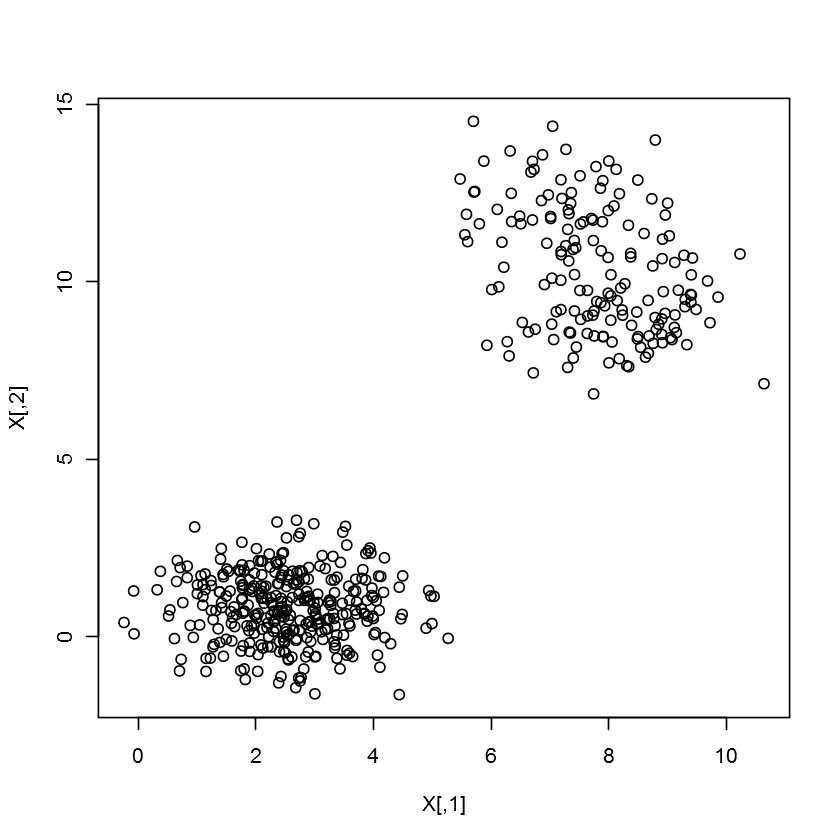

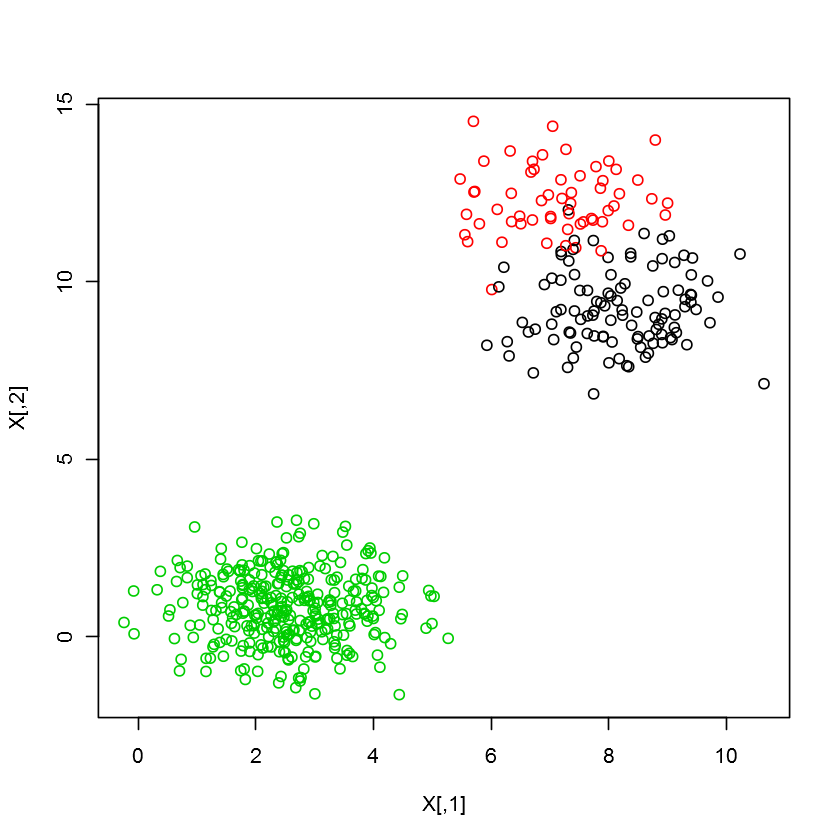

In [84]:
n.gr <- 3 # number of component distributions
d <- 2 # dimension
# Fraction of n.gr distributions
f <- runif(n.gr)
f <- f/sum(f)
f
# means
ms <- matrix(runif(n.gr*d),ncol=d)*15
# var-covar matrices are unit matrix for all components

# Sampling
n.sample <- 500
gr.label <- sample(1:3,n.sample,replace=TRUE,prob=f)
table(gr.label)
# locations of samples
X <- matrix(0,n.sample,d)
for(i in 1:n.sample){
    this.gr <- gr.label[i]
    X[i,] <- c(rnorm(1,ms[this.gr,1]),rnorm(1,ms[this.gr,2]))
}

plot(X)
plot(X,col=gr.label) # color with group label

K-means clustering with 3 clusters of sizes 170, 166, 164

Cluster means:
      [,1]        [,2]
1 2.449124  1.60408426
2 2.615693  0.04678197
3 7.797694 10.32833542

Clustering vector:
  [1] 3 1 1 2 2 1 2 3 2 3 1 2 3 1 1 1 3 3 1 3 3 2 1 2 3 3 2 3 2 1 1 3 3 1 2 3 1
 [38] 1 3 2 2 2 1 2 1 1 1 3 2 1 2 1 3 3 3 1 1 1 2 2 1 1 2 2 2 3 2 3 1 3 2 2 2 2
 [75] 1 1 3 2 2 3 3 2 3 2 3 1 1 2 1 1 3 1 2 1 3 3 2 1 3 2 1 1 1 1 1 2 2 1 2 1 2
[112] 1 3 2 2 3 2 3 2 1 1 1 2 3 2 2 3 2 3 1 3 2 2 3 2 2 3 2 1 3 2 2 2 2 2 1 1 3
[149] 2 2 1 3 2 3 3 2 1 2 3 2 1 1 3 1 2 1 2 2 2 3 3 3 1 1 1 3 3 2 1 3 1 1 3 1 3
[186] 3 2 3 3 1 3 2 1 1 1 2 2 2 3 2 1 3 2 1 2 2 3 2 3 3 2 3 2 1 1 1 2 3 2 3 1 1
[223] 2 2 3 3 3 3 2 2 1 3 3 3 3 2 1 2 3 2 3 1 1 3 2 2 2 1 1 3 3 3 1 3 3 1 1 2 1
[260] 3 1 2 2 3 3 2 3 2 2 2 1 2 1 2 1 3 1 2 3 1 3 1 2 2 1 1 3 1 3 3 3 1 2 1 2 1
[297] 3 1 1 2 1 2 3 2 1 2 1 3 1 3 1 1 1 2 3 1 2 1 3 3 2 2 2 3 2 3 2 3 2 1 2 3 1
[334] 3 2 2 2 3 3 1 3 2 2 1 2 1 3 1 1 1 3 1 1 2 3 1 3 3 2 1 3 3 1 3 3 3 1 1 1 2
[371] 1 3 3 1 

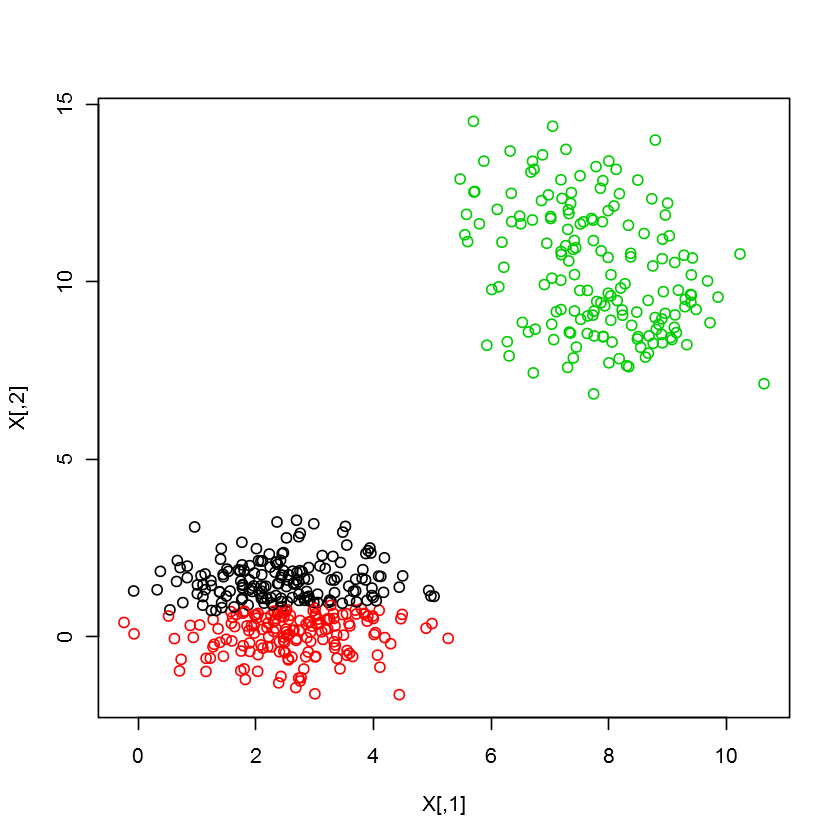

In [85]:
cl <- kmeans(X,n.gr)
plot(X, col = cl$cluster)
cl

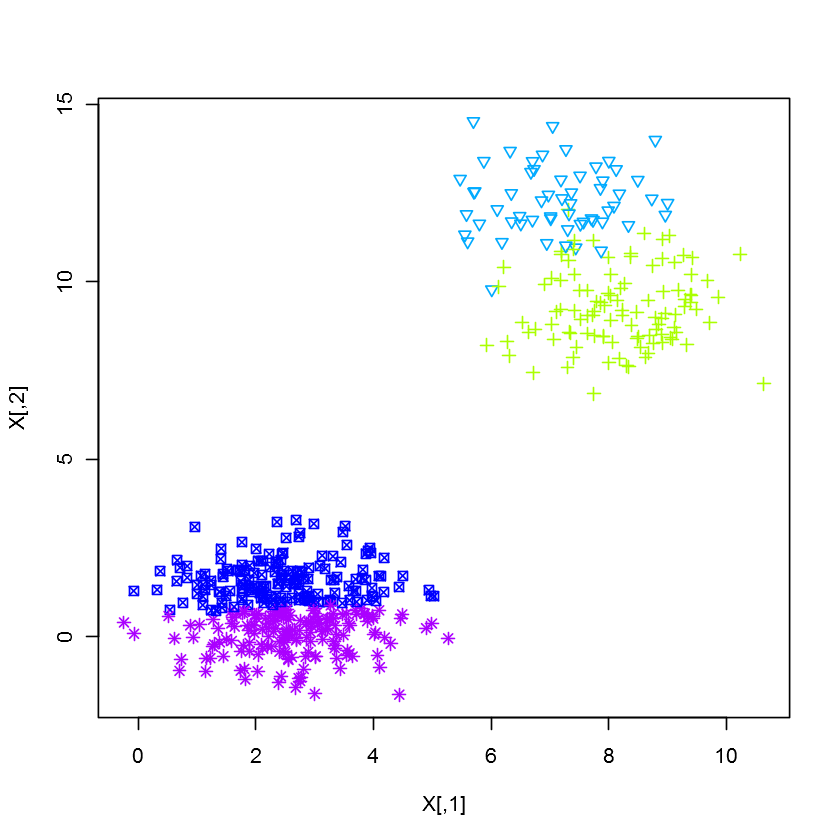

In [86]:
plot(X, col = rainbow(9)[(cl$cluster-1) + 3*(gr.label-1)+1],pch=(cl$cluster-1) + 3*(gr.label-1)+1)

### Assignment 課題 (Math)

In the above plot, a formula (cl$cluster-1) + 3^(gr.label-1) + 1 was used to specify 9 patterns, 3 true labels x 3 classification labels. It is ternary numbering system-based conversion. Describe the formula.

## Prediction 予測

The clusters identified above have their centers.

New samples can be labeled based on the distance from the centers.

In [87]:
library(kmeans.ddR)
library(ddR)
cl2 <- dkmeans(as.darray(X),n.gr) # kmeans clustering by a different function in kmeans.ddR package
# The result of 2nd kmeans method may be different from the 1st, 
# because the result depends on the locations of centers selected initially.
cl2
print("=============")
cl

K-means clustering with 3 clusters of sizes 94, 336, 70

Cluster means:
      [,1]       [,2]
1 8.207264  9.0131255
2 2.531417  0.8347028
3 7.247700 12.0944745

Within cluster sum of squares by cluster:
[1] NA
 (between_SS / total_SS =    NA %)

Available components:
[1] "centers"      "totss"        "withinss"     "tot.withinss" "betweenss"   
[6] "size"         "iter"        

[1] "============="


K-means clustering with 3 clusters of sizes 170, 166, 164

Cluster means:
      [,1]        [,2]
1 2.449124  1.60408426
2 2.615693  0.04678197
3 7.797694 10.32833542

Clustering vector:
  [1] 3 1 1 2 2 1 2 3 2 3 1 2 3 1 1 1 3 3 1 3 3 2 1 2 3 3 2 3 2 1 1 3 3 1 2 3 1
 [38] 1 3 2 2 2 1 2 1 1 1 3 2 1 2 1 3 3 3 1 1 1 2 2 1 1 2 2 2 3 2 3 1 3 2 2 2 2
 [75] 1 1 3 2 2 3 3 2 3 2 3 1 1 2 1 1 3 1 2 1 3 3 2 1 3 2 1 1 1 1 1 2 2 1 2 1 2
[112] 1 3 2 2 3 2 3 2 1 1 1 2 3 2 2 3 2 3 1 3 2 2 3 2 2 3 2 1 3 2 2 2 2 2 1 1 3
[149] 2 2 1 3 2 3 3 2 1 2 3 2 1 1 3 1 2 1 2 2 2 3 3 3 1 1 1 3 3 2 1 3 1 1 3 1 3
[186] 3 2 3 3 1 3 2 1 1 1 2 2 2 3 2 1 3 2 1 2 2 3 2 3 3 2 3 2 1 1 1 2 3 2 3 1 1
[223] 2 2 3 3 3 3 2 2 1 3 3 3 3 2 1 2 3 2 3 1 1 3 2 2 2 1 1 3 3 3 1 3 3 1 1 2 1
[260] 3 1 2 2 3 3 2 3 2 2 2 1 2 1 2 1 3 1 2 3 1 3 1 2 2 1 1 3 1 3 3 3 1 2 1 2 1
[297] 3 1 1 2 1 2 3 2 1 2 1 3 1 3 1 1 1 2 3 1 2 1 3 3 2 2 2 3 2 3 2 3 2 1 2 3 1
[334] 3 2 2 2 3 3 1 3 2 2 1 2 1 3 1 1 1 3 1 1 2 3 1 3 3 2 1 3 3 1 3 3 3 1 1 1 2
[371] 1 3 3 1 

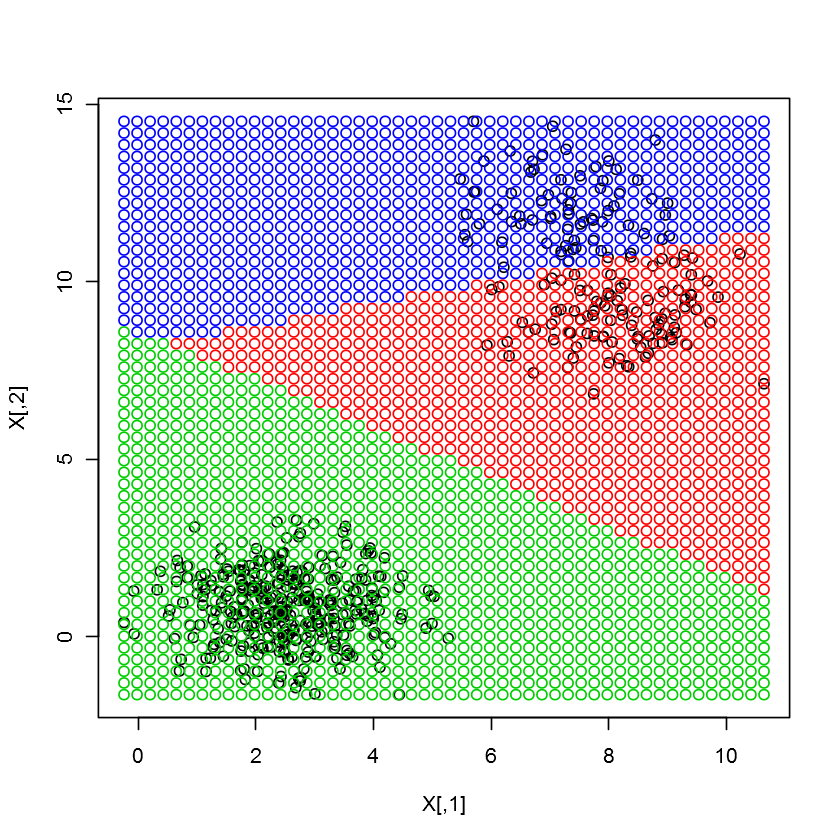

In [88]:
# A grid points
rng <- apply(X,2,range)
x1 <- seq(from=rng[1,1],to=rng[2,1],length=50)
x2 <- seq(from=rng[1,2],to=rng[2,2],length=50)
x12 <- as.matrix(expand.grid(x1,x2))
# prediction of labels for the points in x12 based on the result of kmeans method
pred <- predict(cl2,x12)

plot(X)
points(x12,col=pred+1)